In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import platform
#import SIRD_Model_Experimental
import SIRD_Model
from sklearn import linear_model


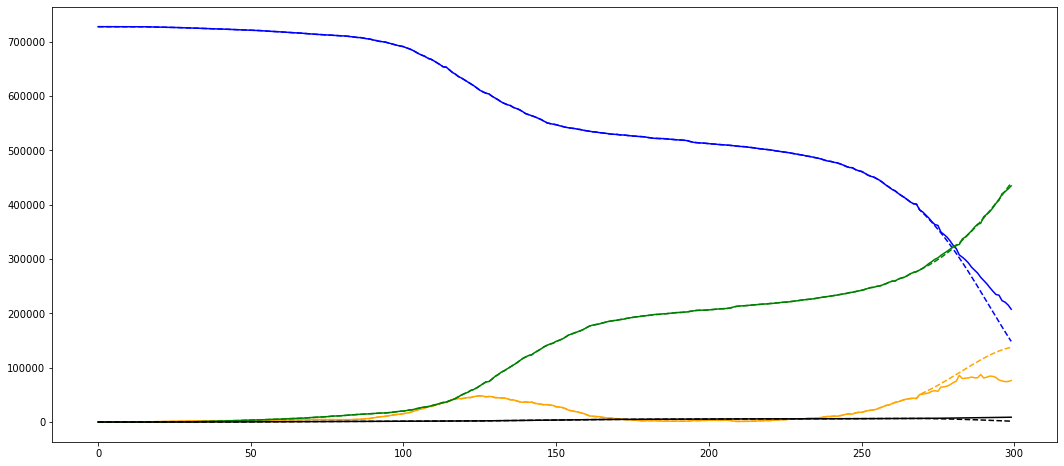

In [2]:
if platform.system() == "Windows":
    pathc="..\\Data\\Covid Tracking State Data\\"
elif platform.system() == "Linux":
    pathc="../Data/Covid Tracking State Data/"
    
filename = "AZ.csv"

dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

pop = 7279000
numDays = 300
daysToPredict = 30
infect = infectRaw[0:numDays]
recov = recovRaw[0:numDays]
dead = deadRaw[0:numDays]

recovG = np.zeros(len(recov))
deadD = np.diff(dead)

for i in range(len(infect) - 14):
    recovG[i + 14] = infect[i] - deadD[i+13]
infect = infect - recovG - dead
#q=None #use this to have function automatically calculte q
#q = SIRD_Model.getQBasis(infect, recovG, dead, pop, qMax=.5)
q = 0.1
SIRD_Model.predictMatchBasis(infect, recovG, dead, pop, daysToPredict, qVal=q, smooth=False) #print with smoothing method


# Arkansas Guesstimate :)


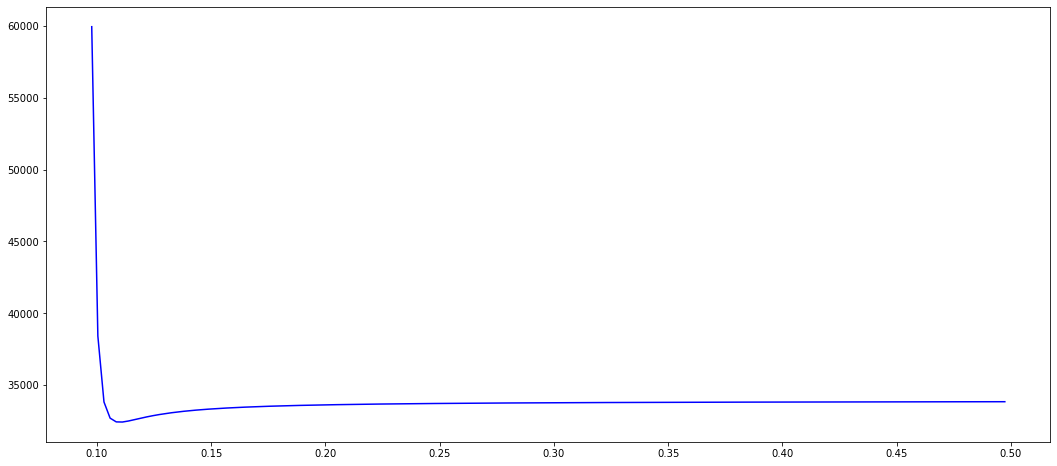

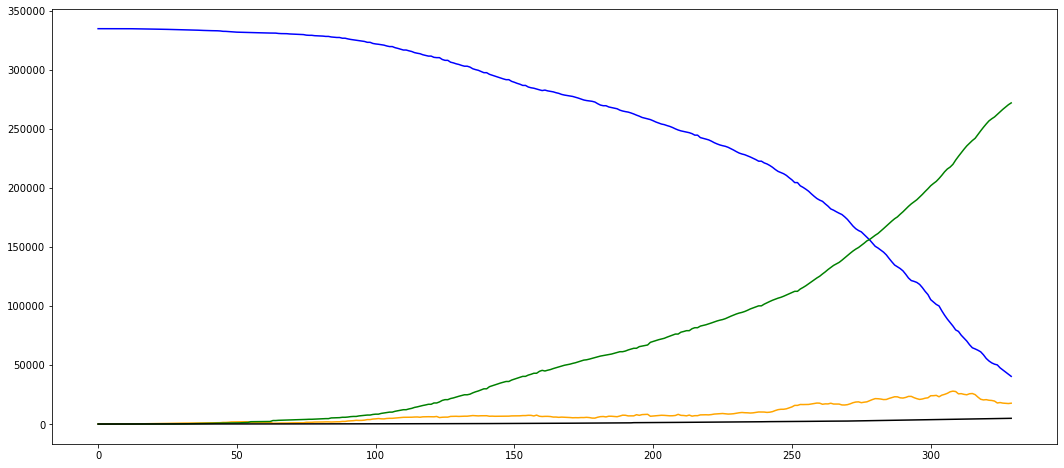

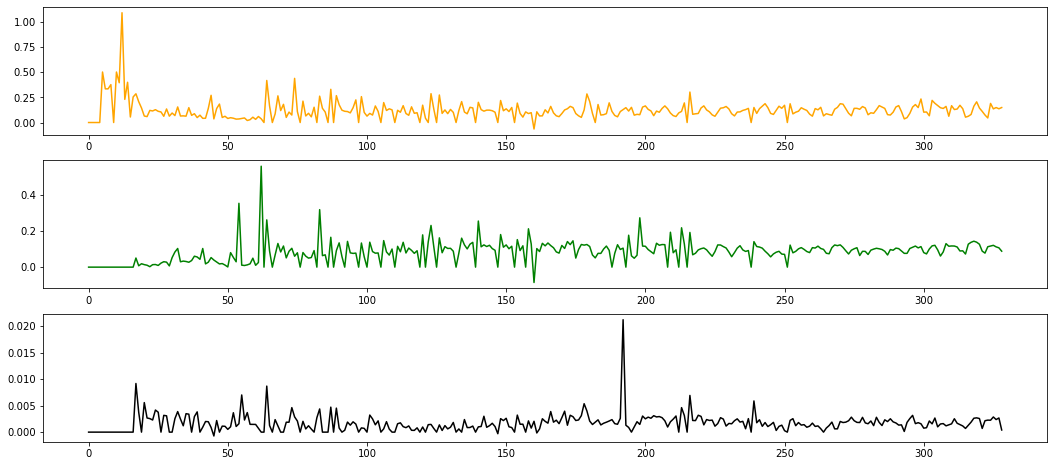

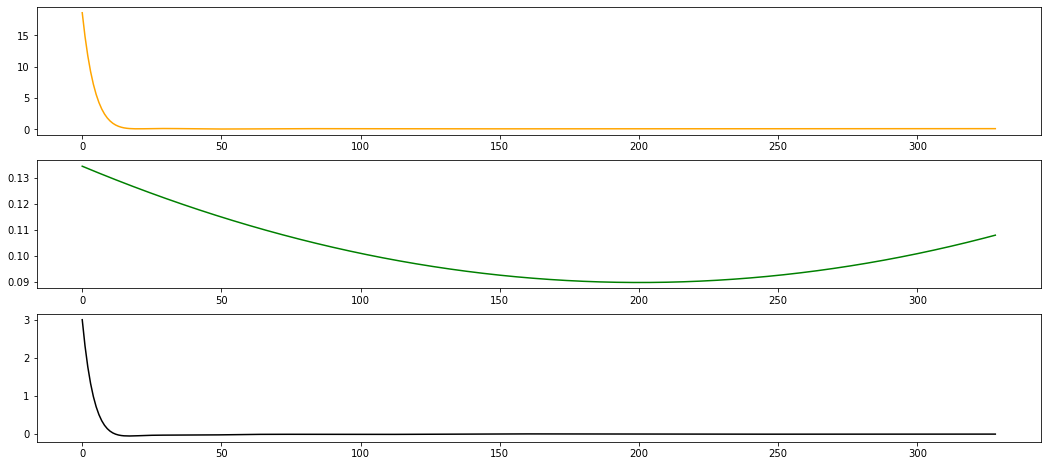

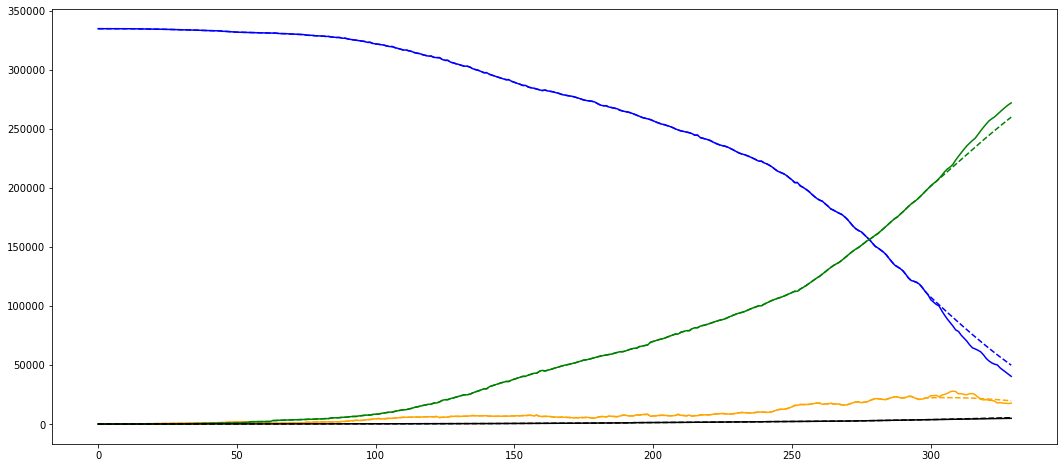

In [5]:
if platform.system() == "Windows":
    pathc="..\\Data\\Covid Tracking State Data\\"
elif platform.system() == "Linux":
    pathc="../Data/Covid Tracking State Data/"
    
filename = "AR.csv"

dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

pop = 3011000
numDays = 330
daysToPredict = 30
infect = infectRaw[0:numDays]
recov = recovRaw[0:numDays]
dead = deadRaw[0:numDays]
infect = infect - recov - dead
#q=None #use this to have function automatically calculte q
q = SIRD_Model.getQBasis(infect, recov, dead, pop, qMax=.5)
suscept = q*pop - infect - recov - dead
SIRD_Model.calculateAverageParams(infect,recov,dead,pop,q);
SIRD_Model.getBasisFunc(suscept, infect, recov, dead)
SIRD_Model.predictMatchBasis(infect, recov, dead, pop, daysToPredict, qVal = q, smooth=False) #print with smoothing method

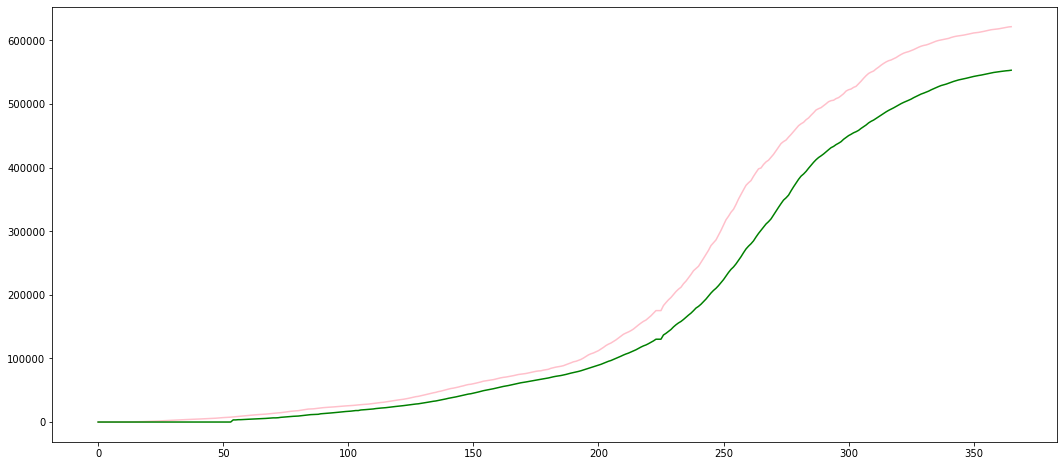

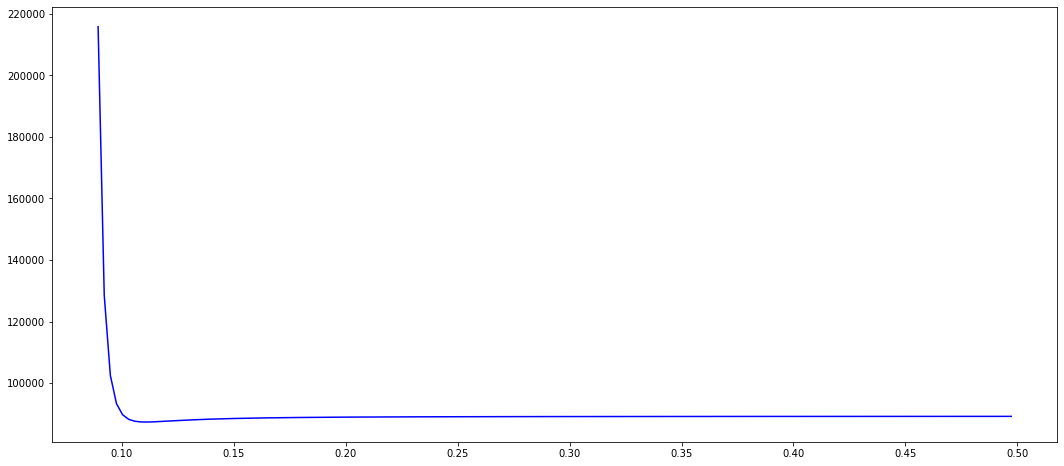

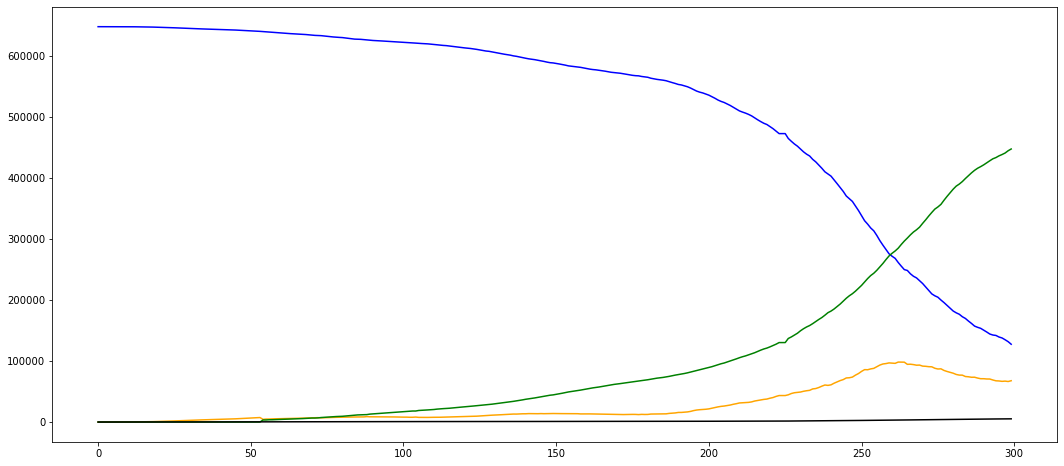

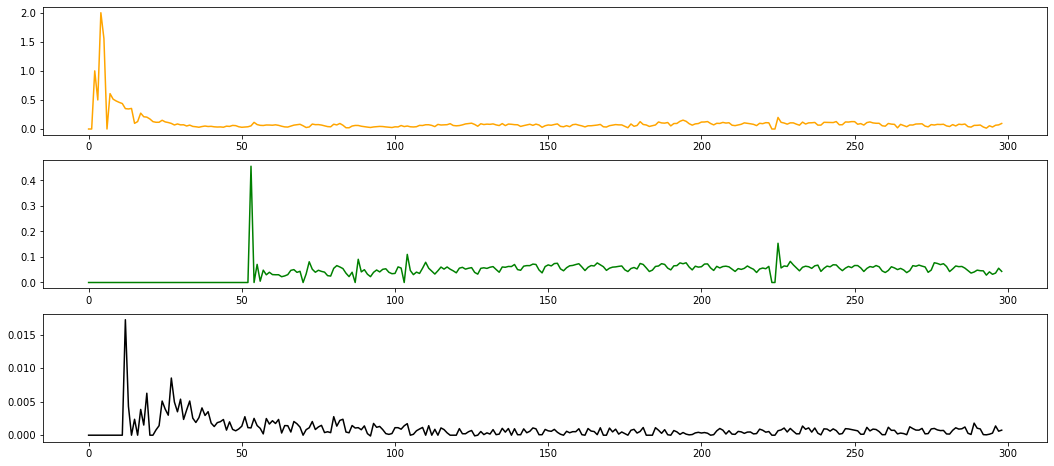

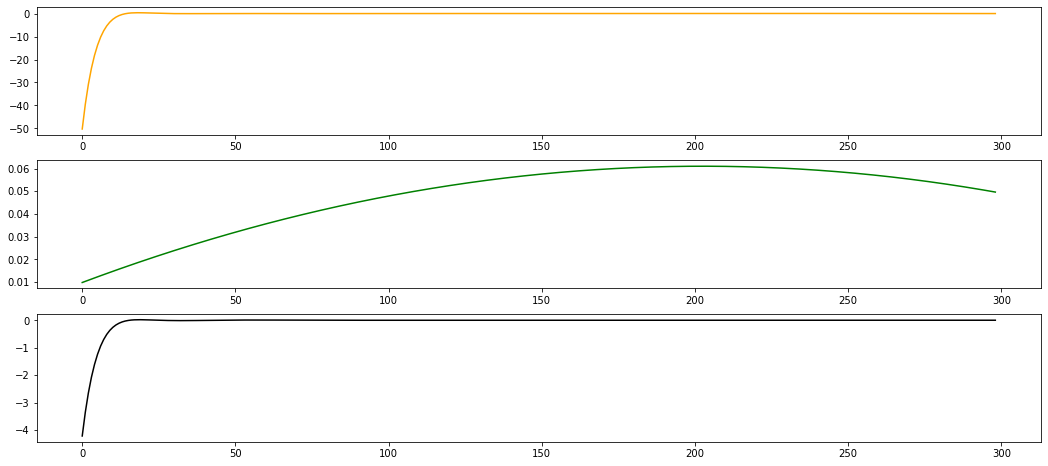

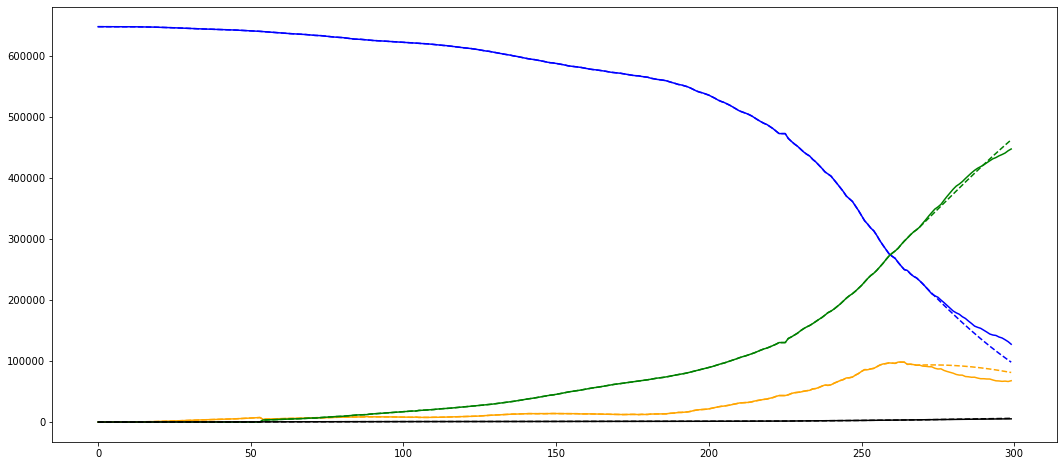

In [5]:
if platform.system() == "Windows":
    pathc="..\\Data\\Covid Tracking State Data\\"
elif platform.system() == "Linux":
    pathc="../Data/Covid Tracking State Data/"
    
filename = "WI.csv"

dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

pop = 5822000
numDays = 300
daysToPredict = 30
infect = infectRaw[0:numDays]
recov = recovRaw[0:numDays]
dead = deadRaw[0:numDays]
infect = infect - recov - dead
#q=None #use this to have function automatically calculte q
q = SIRD_Model.getQBasis(infect, recov, dead, pop, qMax=.5)

suscept = q*pop - infect - recov - dead
SIRD_Model.calculateAverageParams(infect,recov,dead,pop,q)
SIRD_Model.getBasisFunc(suscept, infect, recov, dead)
SIRD_Model.predictMatchBasis(infect, recov, dead, pop, daysToPredict, qVal = q, smooth=False) #print with smoothing method

# Trying to Estimate Recovered

0.04473534501252493
0.13290143137092533


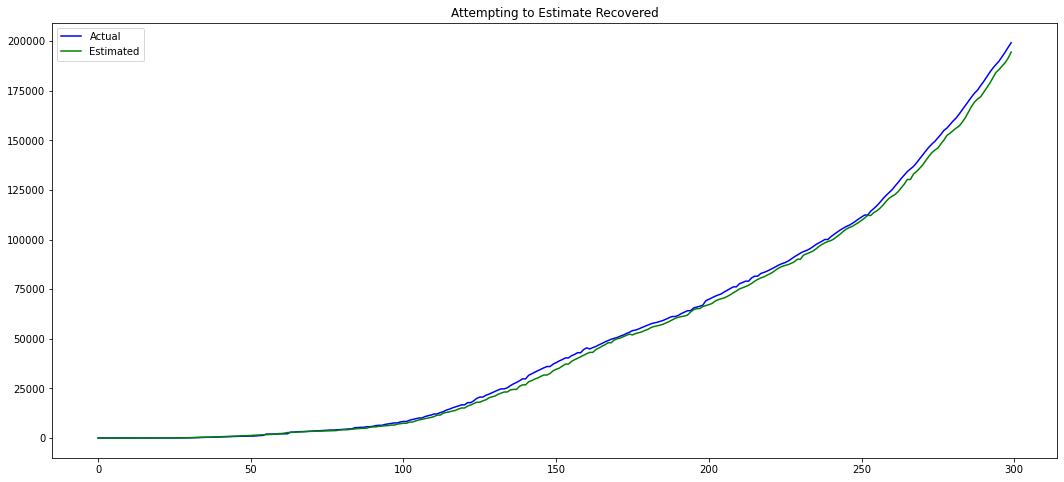

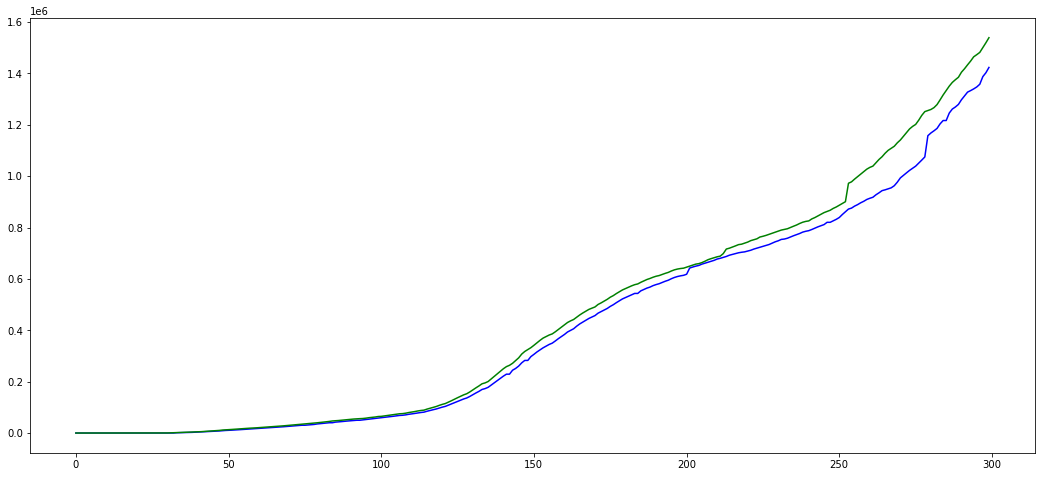

In [29]:
if platform.system() == "Windows":
    pathc="..\\Data\\Covid Tracking State Data\\"
elif platform.system() == "Linux":
    pathc="../Data/Covid Tracking State Data/"
    
filename = "AR.csv"

dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)


numDays = 300
daysToPredict = 30
infect = infectRaw[0:numDays]
recov = recovRaw[0:numDays]
dead = deadRaw[0:numDays]
recovG = np.zeros(len(recov))
deadD = np.diff(dead)
for i in range(len(infect) - 14):
    recovG[i + 14] = infect[i] - deadD[i+13]
    # 
infect = infect - recov - dead
temp = []
for i in range(len(recov)):
    temp.append((recovG[i]-recov[i])**2)
temp = np.array(temp)
temp = np.mean(temp)
temp = np.sqrt(temp)
bot = np.mean(recov)
print(temp/bot)
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(recov, color='blue', label = 'Actual') 
ax.plot(recovG, color = 'green', label = 'Estimated')
ax.set_title('Attempting to Estimate Recovered')
ax.legend()

if platform.system() == "Windows":
    pathc="..\\Data\\Covid Tracking State Data\\"
elif platform.system() == "Linux":
    pathc="../Data/Covid Tracking State Data/"
    
filename = "TX.csv"

dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

numDays = 300
daysToPredict = 30
infect = infectRaw[0:numDays]
recov = recovRaw[0:numDays]
dead = deadRaw[0:numDays]
recovG = np.zeros(len(recov))
deadD = np.diff(dead)
for i in range(len(infect) - 14):
    recovG[i + 14] = infect[i] - deadD[i+13]
infect = infect - recov - dead
temp = []
for i in range(len(recov)):
    temp.append((recovG[i]-recov[i])**2)
temp = np.array(temp)
temp = np.mean(temp)
temp = np.sqrt(temp)
bot = np.mean(recov)
print(temp/bot)
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(recov, color='blue') 
ax.plot(recovG, color = 'green')

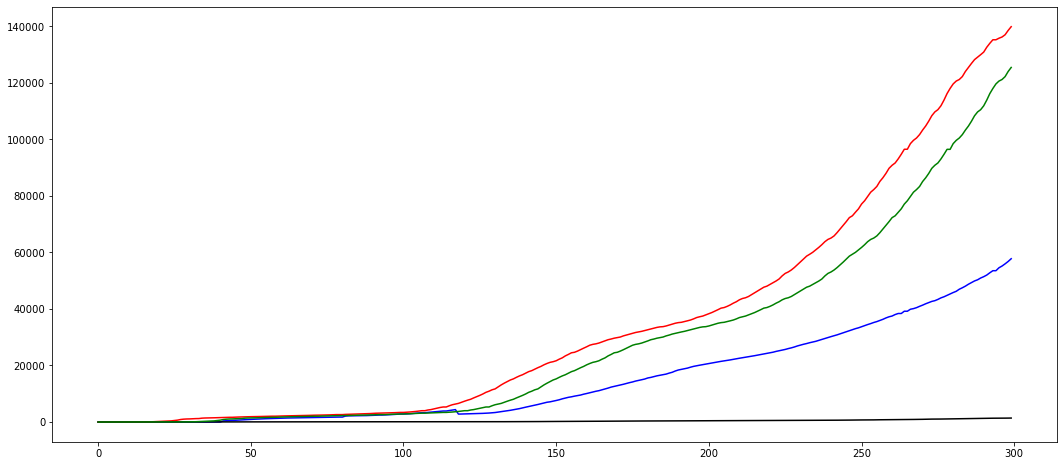

In [41]:
if platform.system() == "Windows":
    pathc="..\\Data\\Covid Tracking State Data\\"
elif platform.system() == "Linux":
    pathc="../Data/Covid Tracking State Data/"
    
filename = "ID.csv"

dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

numDays = 300
daysToPredict = 30
infect = infectRaw[0:numDays]
recov = recovRaw[0:numDays]
dead = deadRaw[0:numDays]
recovG = np.zeros(len(recov))
deadD = np.diff(dead)
for i in range(len(infect) - 14):
    recovG[i + 14] = infect[i] - deadD[i+13]
#infect = infect - recovG - dead

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(recov, color='blue') 
ax.plot(infect, color = 'red')
ax.plot(dead, color = 'black')
ax.plot(recovG, color = 'green')

In [22]:
print(deadD)
print(dead)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   1.   2.   0.
   0.   3.   1.   3.   6.   5.   4.   7.   0.   7.  17.  12.  20.  15.
  22.  13.  14.  23.  22.  27.  28.  17.  16.  31.  46.  29.  35.  25.
  24.  18.  22.  26.  18.  32.  30.  25.  15.  27.  42.  50.  34.  31.
  20.  17.  22.  42.  25.  31.  45.  39.  12.  33.  25.  58.  56.  33.
  31.  11.  22.  50.  21.  40.  26.   0.  21.   9.  26.  39.  25.   0.
  46.   6.  20.  36.  33.  21.  31.  11.   0.  23.  32.  35.  19.  18.
  19.   7.  46.  33.  43.  35.  25.  17.  10.  28.  29.  47.  28.  42.
  27.  10.  21.  57.  44.  50.  33.  29.  18.  60.  98. 105.  95.  99.
  80.  43.  87. 110. 129. 174. 130.  93.  62. 131. 197. 173. 196. 168.
 153. 675. 164. 313.  84. 295. 268.   0. 179. 245. 236. 306. 293. 247.
 116.  31. 220. 324. 255. 313. 238. 143.  51. 216. 309. 234. 258. 215.
 104.  25. 181. 229. 265. 196. 154.  90.  26. 145. 189. 221. 140. 177.
  64.  20.  61. 139. 161. 144. 146.  47.  21. 132. 135. 112. 123. 135.
  45. 